---
# 🎯 Titanic Survival Prediction

This project focuses on building classification models to predict passenger survival from the Titanic dataset using Random Forest, Gradient Boosting, and XGBoost. 

It includes all key steps of a typical ML pipeline: data cleaning, preprocessing, training, and evaluation.


<div>
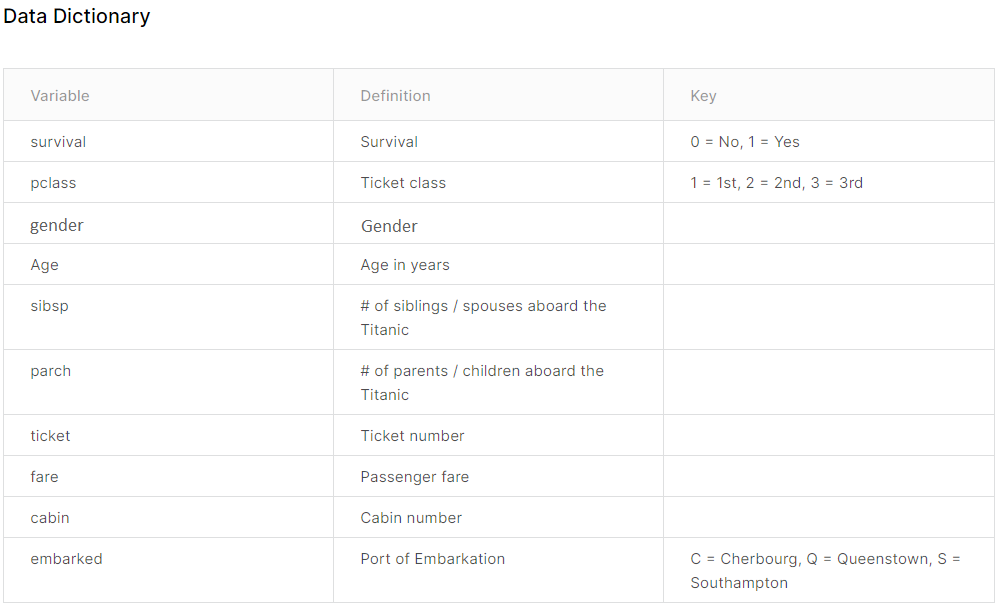
</div>

## 📥 Load the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Load and preview the dataset:

In [2]:
df = pd.read_csv('titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Display summary statistics for numeric features
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Processing missing data and duplicates
Before training a model to make any kind of classification or regression, first we have make sure our data is understandable and there is not garbage in it. 

Although cleaning data is not as entertained as training algorithms, this step is of critical importance in every Machine Learning project. 

First let’s check for missing values or duplicated ones.

### 🔎 Step 1: Remove Uninformative Columns
The following columns do not provide useful predictive information or are identifiers:

- `Name`: too specific and inconsistent

- `Ticket`: contains unstructured text

- `Cabin`: has too many missing values

- `PassengerId`: just an index

In [4]:
not_useful = ['Name', 'Cabin', 'Ticket', 'PassengerId']
df = df.drop(not_useful, axis = 1)

#### 👥 Step 2: Encode Categorical Feature – Gender
We map the Gender column to binary values:

- `female` → 1

- `male` → 0

In [5]:
df['Sex'] = df['Sex'].map({'female': 1, 'male': 0})

#### 🧾 Step 3: Encode Categorical Feature – `Embarked`
The `Embarked` column indicates the port of embarkation. Since this column contains multiple categories, we apply one-hot encoding to convert it into binary columns.

In [6]:
# Embarked column
df = pd.get_dummies(df, columns = ["Embarked"])

#### ❗ Step 4: Handle Missing Values
We check the dataset for missing values:

In [7]:
print(df.isnull().sum())

Survived        0
Pclass          0
Sex             0
Age           177
SibSp           0
Parch           0
Fare            0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
dtype: int64


 It turns out the Age column has missing values. We'll fill them with the mean age of all passengers.

In [8]:
df['Age'] = df['Age'].fillna(value = df['Age'].mean())

#### ✂️ Step 5: Split the Dataset into Train/Test
We'll prepare our data for training by separating features (`X`) and the target variable (`y`), then splitting it into training and testing sets.

In [9]:
from sklearn.model_selection import train_test_split

- `X` = all features

- `y` = target variable (`Survived`)

In [10]:
# Selecting X features
X = df.copy()

# Selecting Target Feature
y = X.pop('Survived')

In [11]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0
)

---

## 🌲 Random Forest Classifier

We’ll now train a Random Forest Classifier to predict survival using the cleaned Titanic dataset.

In [12]:
from sklearn.ensemble import RandomForestClassifier

We instantiate the model with `random_state=0` for reproducibility, `criterion='gini'` for splitting, and `n_estimators=100` trees:

In [13]:
RandomForest = RandomForestClassifier(random_state=0, criterion = 'gini', n_estimators = 100)

#### ⚙️ Fit the Model
We train the model on our training dataset:

In [14]:
# train the model on train data
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

#### 📊 Feature Importance Visualization
Let’s visualize which features had the highest impact on the model’s decision-making.

In [15]:
importances = model.feature_importances_

In [16]:
# Sort
indices = np.argsort(importances)[::-1]
names = [X_train.columns.values[i] for i in indices]

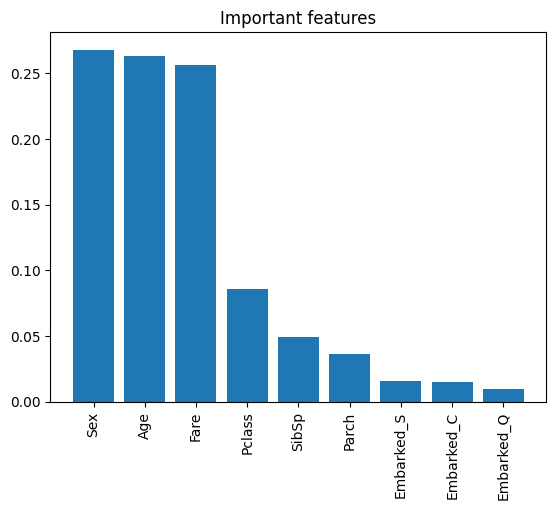

In [17]:
# Plot
plt.figure()

# Title
plt.title("Important features")

# Bar
plt.bar(range(X_train.shape[1]), importances[indices])

# x Axes names
plt.xticks(range(X_train.shape[1]), names, rotation=90)

# Show
plt.show ()

This gives us a clear view of which variables most influenced survival predictions — super useful for both model explainability and domain insights.

#### ✅ Evaluate Model Accuracy on Test Data

We start by checking how well our trained Random Forest model performs on unseen data.

In [18]:
model.score(X_test, y_test)

0.8251121076233184

---

### 🔍 Bonus: Manual Accuracy Calculation
Let’s compute the accuracy without using .score() just to better understand what it actually measures.

In [19]:
y_pred = model.predict(X_test)

In [20]:
counter = 0
for i in range(len(y_pred)):
    if y_pred[i] == y_test.values.tolist()[i]:
        counter += 1

In [21]:
counter / len(y_pred) * 100

82.51121076233184

## 🌱Gradient Boosting Classifier
Let’s try another model — Gradient Boosting, which builds an ensemble of weak learners (decision trees) in a stage-wise fashion to reduce bias.

In [22]:
from sklearn.ensemble import GradientBoostingClassifier

In [23]:
GBC = GradientBoostingClassifier(random_state=0, n_estimators = 100, max_depth = 4)

#### ⚙️ Fit and Evaluate the Gradient Boosting Model

In [24]:
model1 = GradientBoostingClassifier()
model1.fit(X_train, y_train)
model1.score(X_test, y_test)

0.8430493273542601

## ⚡ XGBoost Classifier

Let’s now test XGBoost, one of the most powerful boosting algorithms in machine learning, known for its performance and flexibility.

In [25]:
from xgboost import XGBClassifier

In [26]:
model2 = XGBClassifier()
model2.fit(X_train, y_train)
model2.score(X_test, y_test)

0.8340807174887892

### 📊 Feature Importance Visualization

In [27]:
import matplotlib.pyplot as plt
import numpy as np

In [28]:
# Extract feature importances from the trained model
importances = model2.feature_importances_
feature_names = X_train.columns

In [29]:
# Sort the features by importance
indices = np.argsort(importances)
sorted_features = feature_names[indices]
sorted_importances = importances[indices]

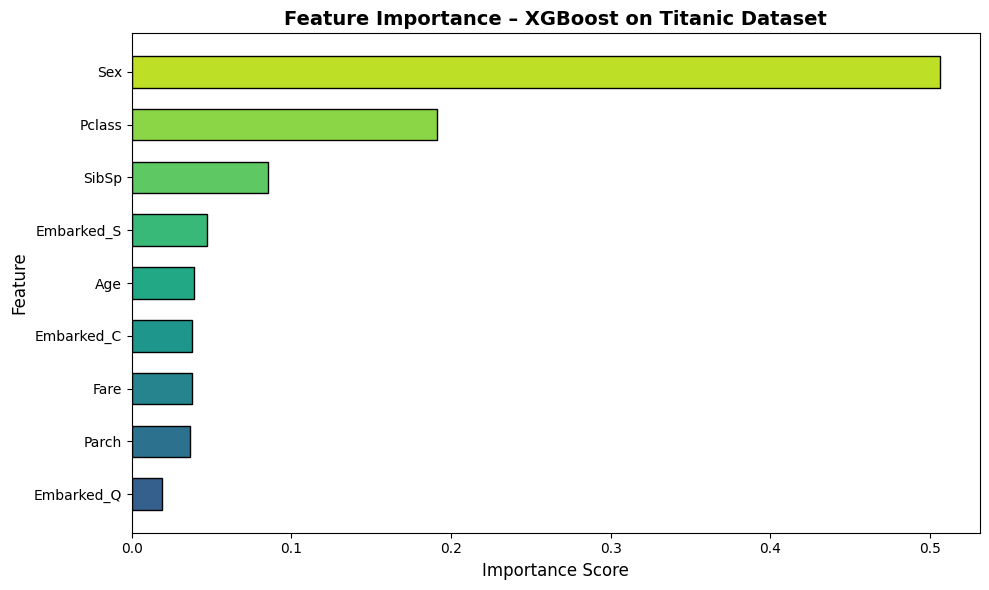

In [30]:
# Use soft, clean Viridis palette
colors = plt.cm.viridis(np.linspace(0.3, 0.9, len(sorted_features)))

# Plot
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances, color=colors, edgecolor='black', height=0.6)

# Labels and style
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.title("Feature Importance – XGBoost on Titanic Dataset", fontsize=14, weight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()